<a href="https://colab.research.google.com/github/cszubert/colab/blob/master/Hands_on_ML_Workbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

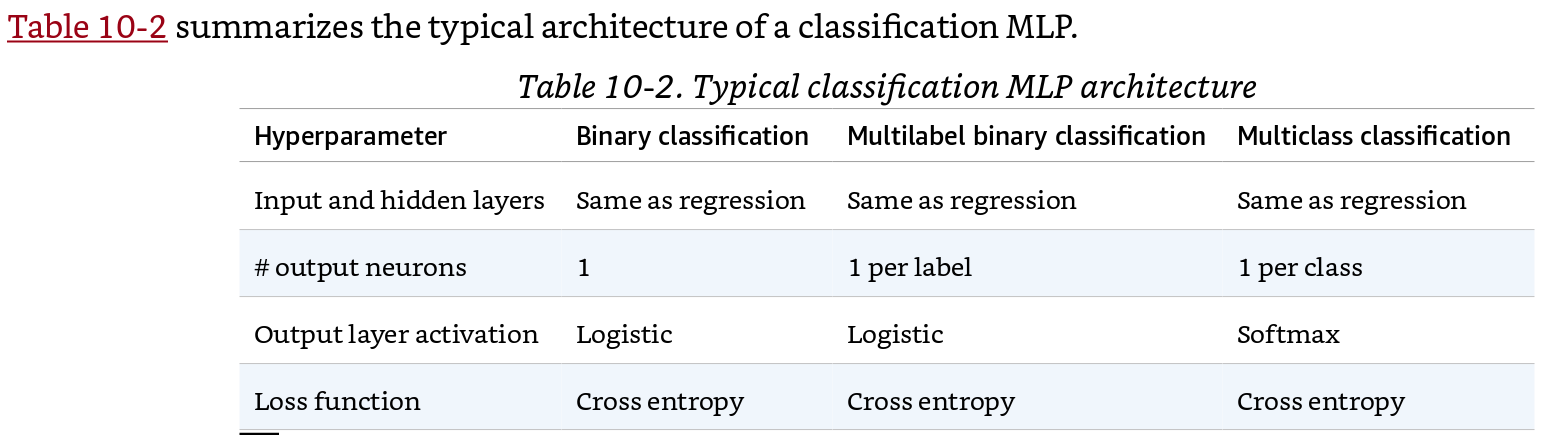

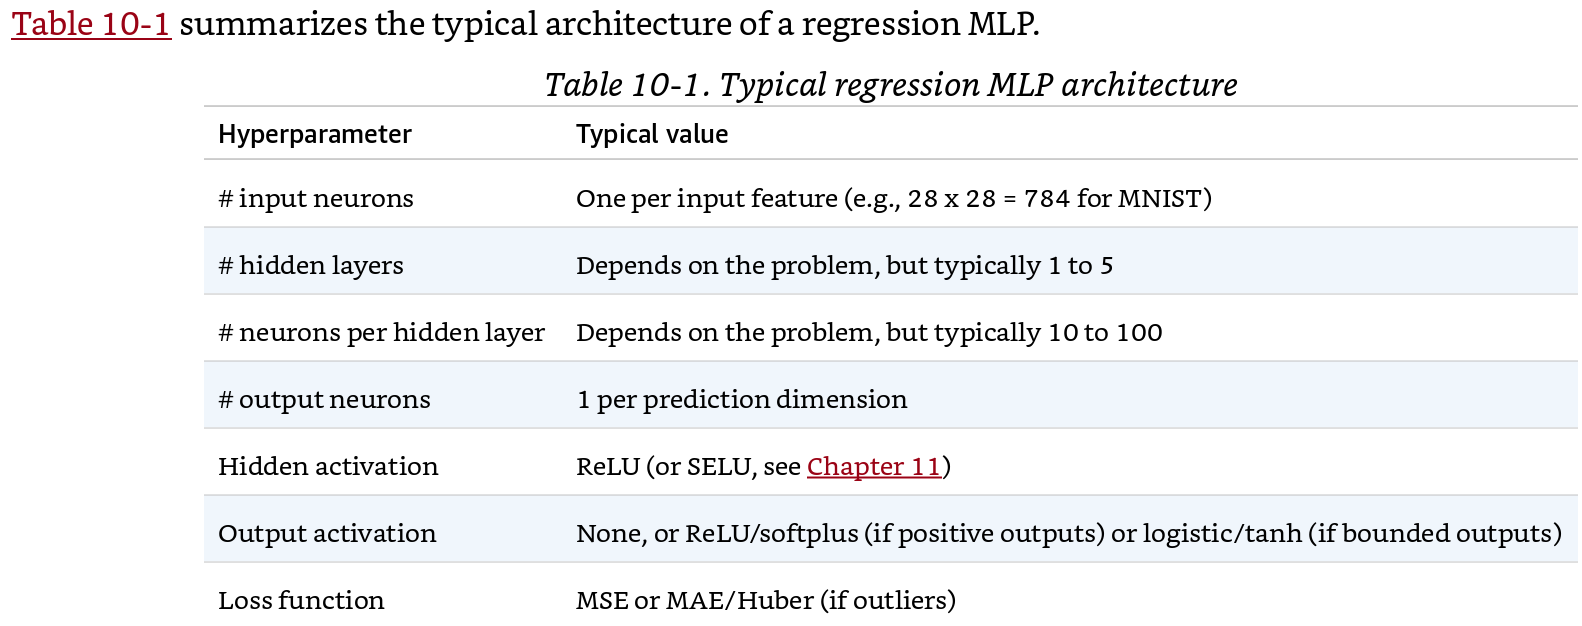

# Hands-On Machine Learning with sckit-learn, keras, and TensorFlow - Workbook

### Clone book examples repo

In [ ]:
!git clone https://github.com/ageron/handson-ml2.git

Cloning into 'handson-ml2'...
remote: Enumerating objects: 3100, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 3100 (delta 0), reused 1 (delta 0), pack-reused 3096
Receiving objects: 100% (3100/3100), 150.92 MiB | 15.37 MiB/s, done.
Resolving deltas: 100% (1905/1905), done.


In [ ]:
!ls handson-ml2

01_the_machine_learning_landscape.ipynb
02_end_to_end_machine_learning_project.ipynb
03_classification.ipynb
04_training_linear_models.ipynb
05_support_vector_machines.ipynb
06_decision_trees.ipynb
07_ensemble_learning_and_random_forests.ipynb
08_dimensionality_reduction.ipynb
09_unsupervised_learning.ipynb
10_neural_nets_with_keras.ipynb
11_training_deep_neural_networks.ipynb
12_custom_models_and_training_with_tensorflow.ipynb
13_loading_and_preprocessing_data.ipynb
14_deep_computer_vision_with_cnns.ipynb
15_processing_sequences_using_rnns_and_cnns.ipynb
16_nlp_with_rnns_and_attention.ipynb
17_autoencoders_and_gans.ipynb
18_reinforcement_learning.ipynb
19_training_and_deploying_at_scale.ipynb
apt.txt
book_equations.pdf
changes_in_2nd_edition.md
datasets
docker
environment.yml
extra_autodiff.ipynb
extra_gradient_descent_comparison.ipynb
images
index.ipynb
INSTALL.md
LICENSE
math_differential_calculus.ipynb
math_linear_algebra.ipynb
ml-project-checklist.md
README.md
requirements.txt
too

### Import TensorFlow and Keras

In [ ]:
import tensorflow as tf
from tensorflow import keras
print('TensorFlow Version: '+str(tf.__version__))
#print('Keras Version: '+str(keras.__version__)) # Fails with error: AttributeError: module 'keras.api._v2.keras' has no attribute '__version__'

TensorFlow Version: 2.13.0


In [ ]:
# Set random seeds
tf.random.set_seed(13)
#np.random.seed(13)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

### Load Fashion MNIST

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_keras, y_train_keras), (X_test_keras, y_test_keras) = fashion_mnist.load_data()

In [ ]:
X_train_keras.shape

(60000, 28, 28)

In [ ]:
X_train_keras.dtype

dtype('uint8')

In [ ]:
X_pred, X_valid, X_train = X_train_keras[:3]/255.0, X_train_keras[:5000]/255.0, X_train_keras[5000:]/255.0
y_valid, y_train = y_train_keras[:5000], y_train_keras[5000:]
X_test = X_test_keras/255.0
y_test = y_test_keras

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
            'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

## Sequential API

In [ ]:
model1 = keras.models.Sequential()
model1.add(keras.layers.Flatten(input_shape=[28,28]))
model1.add(keras.layers.Dense(300, activation='relu'))
model1.add(keras.layers.Dense(100, activation='relu'))
model1.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model1.layers

In [ ]:
weights, biases = model1.layers[3].get_weights()
weights[0]

array([ 0.09865695, -0.10693757,  0.14572912,  0.16183442,  0.05878416,
        0.13517216,  0.16293365, -0.04612082,  0.09060815,  0.04844263],
      dtype=float32)

In [ ]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
model1.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [ ]:
history = model1.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.7247 - accuracy: 0.7659 - val_loss: 0.5211 - val_accuracy: 0.8252
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4898 - accuracy: 0.8304 - val_loss: 0.4421 - val_accuracy: 0.8502
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4453 - accuracy: 0.8439 - val_loss: 0.4449 - val_accuracy: 0.8474
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4175 - accuracy: 0.8528 - val_loss: 0.4428 - val_accuracy: 0.8502
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3988 - accuracy: 0.8607 - val_loss: 0.3881 - val_accuracy: 0.8660
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3816 - accuracy: 0.8659 - val_loss: 0.3715 - val_accuracy: 0.8746
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3687 - accuracy: 0.8698 - val_loss: 0.3987 - val_accuracy

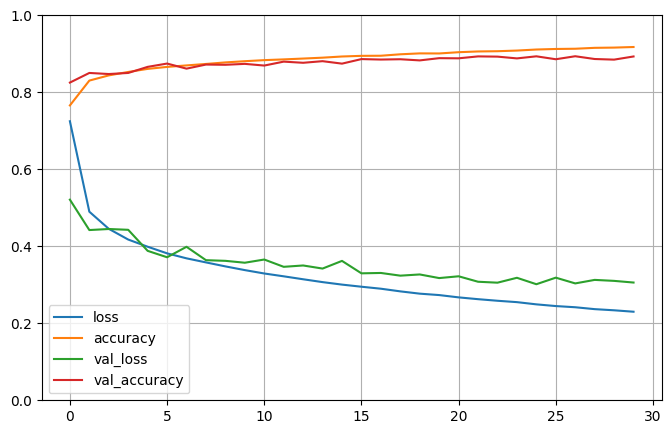

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
model1.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3343 - accuracy: 0.8837


[0.3342662453651428, 0.8837000131607056]

313/313 [==============================] - 2s 7ms/step - loss: 0.3280 - accuracy: 0.8821
[0.32801610231399536, 0.882099986076355]

### Model with no flatten layer

In [ ]:
X_train_flat = X_train.reshape(-1,28*28)
X_valid_flat = X_valid.reshape(-1,28*28)

In [ ]:
X_test_flat = X_test.reshape(-1,28*28)

In [ ]:
model2 = keras.models.Sequential()
model2.add(keras.layers.Dense(300, activation='relu', input_shape=(28*28,)))
model2.add(keras.layers.Dense(100, activation='relu'))
model2.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model2.layers

In [ ]:
model2.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [ ]:
history = model2.fit(X_train_flat, y_train, epochs=30,
                    validation_data=(X_valid_flat, y_valid))

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7207 - accuracy: 0.7631 - val_loss: 0.5216 - val_accuracy: 0.8236
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4872 - accuracy: 0.8289 - val_loss: 0.4350 - val_accuracy: 0.8512
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4423 - accuracy: 0.8440 - val_loss: 0.4421 - val_accuracy: 0.8478
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4139 - accuracy: 0.8538 - val_loss: 0.4442 - val_accuracy: 0.8470
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3959 - accuracy: 0.8601 - val_loss: 0.3859 - val_accuracy: 0.8660
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3783 - accuracy: 0.8663 - val_loss: 0.3678 - val_accuracy: 0.8728
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3654 - accuracy: 0.8691 - val_loss: 0.4058 - val_accuracy:

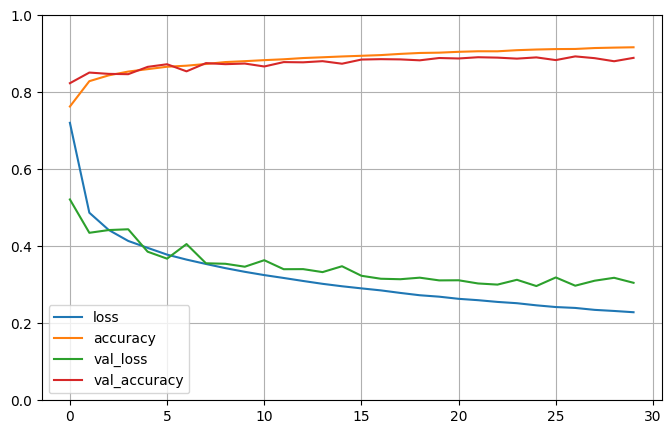

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
model2.evaluate(X_test_flat, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3362 - accuracy: 0.8786


[0.33624640107154846, 0.878600001335144]

313/313 [==============================] - 1s 3ms/step - loss: 0.3329 - accuracy: 0.8825
[0.33289000391960144, 0.8824999928474426]

### Model: Various ways of specifying input shape

In [ ]:
model3 = keras.models.Sequential()
model3.add(tf.keras.Input(shape=(28,28,)))                 # using tf.keras.Input
#model3.add(keras.layers.Input(shape=(28,28)))                 # using tf.keras.Input
#model3.add(keras.layers.InputLayer(input_shape=[28,28]))  # using keras.layers.InputLayer
#model3.add(keras.layers.Flatten(input_shape=(28,28,)))     # using input_shape kwarg
model3.add(keras.layers.Flatten())
model3.add(keras.layers.Dense(300, activation='relu'))
model3.add(keras.layers.Dense(100, activation='relu'))
model3.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 300)               235500    
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model3.layers

In [ ]:
weights, biases = model3.layers[2].get_weights()
weights[0]

array([-0.0420754 ,  0.01242264,  0.01359867, -0.01775538,  0.02506562,
        0.11195395, -0.12237588,  0.08390135,  0.06950665, -0.1065767 ,
        0.1125684 ,  0.07563093, -0.04402037, -0.05459884, -0.0862411 ,
       -0.03299677, -0.07146645,  0.08885228, -0.02407602,  0.01427848,
        0.07713553,  0.10832755, -0.03178024,  0.09440019,  0.00392497,
        0.08626125,  0.09163935,  0.0664841 ,  0.06338165, -0.03050264,
        0.07003988,  0.09089287,  0.05629701, -0.07634455, -0.08928388,
        0.0190618 , -0.02646986, -0.0341567 , -0.12106362, -0.07826969,
        0.05787814,  0.05900947,  0.09417903, -0.01113652,  0.11388443,
        0.00794444,  0.0658636 , -0.01172528, -0.00133894,  0.01602947,
        0.1192129 ,  0.01662119, -0.1194902 ,  0.10852223,  0.06822161,
        0.08451391,  0.03972068,  0.06704641, -0.04181672,  0.0232868 ,
        0.11161719, -0.02504127,  0.02586325, -0.06427208,  0.05860832,
        0.1156097 , -0.01222136, -0.10207263,  0.08590848, -0.06

In [ ]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [ ]:
model3.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [ ]:
history = model3.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 10s 5ms/step - loss: 0.7180 - accuracy: 0.7652 - val_loss: 0.5206 - val_accuracy: 0.8238
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4857 - accuracy: 0.8307 - val_loss: 0.4340 - val_accuracy: 0.8540
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4423 - accuracy: 0.8448 - val_loss: 0.4458 - val_accuracy: 0.8490
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4144 - accuracy: 0.8533 - val_loss: 0.4434 - val_accuracy: 0.8476
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3966 - accuracy: 0.8611 - val_loss: 0.3860 - val_accuracy: 0.8638
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3793 - accuracy: 0.8671 - val_loss: 0.3681 - val_accuracy: 0.8734
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3659 - accuracy: 0.8701 - val_loss: 0.3922 - val_accuracy

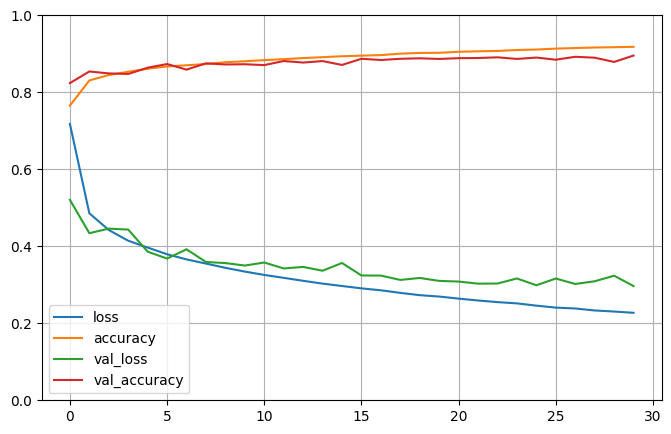

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
model3.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3275 - accuracy: 0.8827


[0.3274782598018646, 0.8827000260353088]

313/313 [==============================] - 2s 6ms/step - loss: 0.3286 - accuracy: 0.8837
[0.3285638689994812, 0.8837000131607056]

### Using Sequential Model

In [ ]:
model4 = keras.models.Sequential([
  #tf.keras.Input(shape=(28,28)),                 # using tf.keras.Input
  keras.layers.InputLayer(input_shape=[28,28]),  # using keras.layers.InputLayer
  #keras.layers.Flatten(input_shape=(28,28,)),     # using input_shape kwarg
  keras.layers.Flatten(),
  keras.layers.Dense(300, activation='relu'),
  keras.layers.Dense(100, activation='relu'),
  keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 300)               235500    
                                                                 
 dense_10 (Dense)            (None, 100)               30100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model4.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [ ]:
history = model4.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 10s 5ms/step - loss: 0.7241 - accuracy: 0.7604 - val_loss: 0.5194 - val_accuracy: 0.8254
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4859 - accuracy: 0.8309 - val_loss: 0.4335 - val_accuracy: 0.8542
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4411 - accuracy: 0.8458 - val_loss: 0.4295 - val_accuracy: 0.8542
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4131 - accuracy: 0.8551 - val_loss: 0.4320 - val_accuracy: 0.8548
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3949 - accuracy: 0.8610 - val_loss: 0.3819 - val_accuracy: 0.8656
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3778 - accuracy: 0.8661 - val_loss: 0.3639 - val_accuracy: 0.8728
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3645 - accuracy: 0.8710 - val_loss: 0.3924 - val_accuracy

In [ ]:
model4.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3395 - accuracy: 0.8804


[0.33946752548217773, 0.8804000020027161]

### Not specifying input shape

In [ ]:
model5 = keras.models.Sequential([
  keras.layers.Flatten(),
  keras.layers.Dense(300, activation='relu'),
  keras.layers.Dense(100, activation='relu'),
  keras.layers.Dense(10, activation='softmax')
])

In [ ]:
#model5.build(input_shape=(28*28,)) ???

In [ ]:
#model5.summary() # Can not run .summary() because shape had not been specified

In [ ]:
model5.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [ ]:
history = model5.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7431 - accuracy: 0.7557 - val_loss: 0.5212 - val_accuracy: 0.8260
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4920 - accuracy: 0.8298 - val_loss: 0.4416 - val_accuracy: 0.8458
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4455 - accuracy: 0.8442 - val_loss: 0.4332 - val_accuracy: 0.8514
Epoch 4/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4159 - accuracy: 0.8541 - val_loss: 0.4411 - val_accuracy: 0.8436
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3969 - accuracy: 0.8604 - val_loss: 0.3863 - val_accuracy: 0.8656
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3799 - accuracy: 0.8658 - val_loss: 0.3666 - val_accuracy: 0.8720
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3670 - accuracy: 0.8709 - val_loss: 0.4015 - val_accuracy:

In [ ]:
model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 300)               235500    
                                                                 
 dense_13 (Dense)            (None, 100)               30100     
                                                                 
 dense_14 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model5.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3319 - accuracy: 0.8835


[0.33192139863967896, 0.8834999799728394]

In [ ]:
model5.predict(X_pred).round(2)

1/1 [==============================] - 0s 106ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.5 , 0.01, 0.01, 0.34, 0.02, 0.  , 0.11, 0.  , 0.  , 0.  ]],
      dtype=float32)

## Functional API

In [ ]:
X_train.shape[1:]

(28, 28)

In [ ]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
flatten = keras.layers.Flatten()(input_)
hidden1 = keras.layers.Dense(300, activation="relu")(flatten)
hidden2 = keras.layers.Dense(100, activation="relu")(hidden1)
output = keras.layers.Dense(10, activation="softmax")(hidden2)
model10 = keras.models.Model(inputs=[input_], outputs=[output])

In [ ]:
model10.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 300)               235500    
                                                                 
 dense_16 (Dense)            (None, 100)               30100     
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model10.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [ ]:
history = model10.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.7102 - accuracy: 0.7692 - val_loss: 0.5255 - val_accuracy: 0.8214
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4801 - accuracy: 0.8332 - val_loss: 0.4288 - val_accuracy: 0.8558
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4355 - accuracy: 0.8469 - val_loss: 0.4340 - val_accuracy: 0.8494
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4079 - accuracy: 0.8562 - val_loss: 0.4360 - val_accuracy: 0.8496
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3900 - accuracy: 0.8634 - val_loss: 0.3782 - val_accuracy: 0.8716
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3737 - accuracy: 0.8683 - val_loss: 0.3630 - val_accuracy: 0.8756
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3609 - accuracy: 0.8715 - val_loss: 0.3970 - val_accuracy

In [ ]:
model10.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3327 - accuracy: 0.8826


[0.33266663551330566, 0.8826000094413757]

In [ ]:
model10.predict(X_pred).round(2)

1/1 [==============================] - 0s 77ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.68, 0.02, 0.01, 0.14, 0.01, 0.  , 0.13, 0.  , 0.  , 0.  ]],
      dtype=float32)

### Functional API, seperating creting layers from connecting layers

In [ ]:
flatten_ = keras.layers.Flatten()
hidden1_ = keras.layers.Dense(300, activation="relu")
hidden2_ = keras.layers.Dense(100, activation="relu")
output_ = keras.layers.Dense(10, activation="softmax")

In [ ]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
flatten = flatten_(input_)
hidden1 = hidden1_(flatten)
hidden2 = hidden2_(hidden1)
output = output_(hidden2)
model11 = keras.models.Model(inputs=[input_], outputs=[output])

In [ ]:
model11.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 300)               235500    
                                                                 
 dense_19 (Dense)            (None, 100)               30100     
                                                                 
 dense_20 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model11.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [ ]:
history = model11.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 10s 5ms/step - loss: 0.7188 - accuracy: 0.7643 - val_loss: 0.5188 - val_accuracy: 0.8216
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4865 - accuracy: 0.8315 - val_loss: 0.4382 - val_accuracy: 0.8510
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4434 - accuracy: 0.8444 - val_loss: 0.4536 - val_accuracy: 0.8402
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4152 - accuracy: 0.8546 - val_loss: 0.4363 - val_accuracy: 0.8520
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3963 - accuracy: 0.8607 - val_loss: 0.3865 - val_accuracy: 0.8686
Epoch 6/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3792 - accuracy: 0.8671 - val_loss: 0.3705 - val_accuracy: 0.8724
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3662 - accuracy: 0.8703 - val_loss: 0.3986 - val_accuracy

In [ ]:
model11.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3314 - accuracy: 0.8828


[0.3313647210597992, 0.8827999830245972]

In [ ]:
model11.predict(X_pred).round(2)

1/1 [==============================] - 0s 76ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.6 , 0.01, 0.01, 0.26, 0.03, 0.  , 0.09, 0.  , 0.  , 0.  ]],
      dtype=float32)

## Subclass API

In [ ]:
class MyModel(keras.models.Model):
  def __init__(self, **kwargs):
    super().__init__(**kwargs)
    self.flatten = keras.layers.Flatten()
    self.hidden1 = keras.layers.Dense(300, activation='relu')
    self.hidden2 = keras.layers.Dense(100, activation='relu')
    self.output_ = keras.layers.Dense(10, activation='softmax')

  def call(self, input):
    flatten = self.flatten(input)
    hidden1 = self.hidden1(flatten)
    hidden2 = self.hidden2(hidden1)
    output_ = self.output_(hidden2)

    return output_

In [ ]:
model20 = MyModel()

In [ ]:
#model20.summary() # Can't run .summary() becaue model had not been built

In [ ]:
model20.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [ ]:
history = model20.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7217 - accuracy: 0.7659 - val_loss: 0.5206 - val_accuracy: 0.8262
Epoch 2/30
1719/1719 [==============================] - 9s 6ms/step - loss: 0.4883 - accuracy: 0.8300 - val_loss: 0.4342 - val_accuracy: 0.8520
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4435 - accuracy: 0.8441 - val_loss: 0.4459 - val_accuracy: 0.8480
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4155 - accuracy: 0.8541 - val_loss: 0.4464 - val_accuracy: 0.8484
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3970 - accuracy: 0.8603 - val_loss: 0.3876 - val_accuracy: 0.8666
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3796 - accuracy: 0.8668 - val_loss: 0.3660 - val_accuracy: 0.8738
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3659 - accuracy: 0.8709 - val_loss: 0.4007 - val_accuracy:

In [ ]:
model20.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         multiple                  0         
                                                                 
 dense_21 (Dense)            multiple                  235500    
                                                                 
 dense_22 (Dense)            multiple                  30100     
                                                                 
 dense_23 (Dense)            multiple                  1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model20.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3317 - accuracy: 0.8834


[0.33174487948417664, 0.883400022983551]

In [ ]:
model20.predict(X_pred).round(2)

1/1 [==============================] - 0s 65ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.39, 0.02, 0.01, 0.42, 0.01, 0.  , 0.15, 0.  , 0.  , 0.  ]],
      dtype=float32)